# Lab 4: Basic data exploration, logistic regression, and basic evaluation

#### We will start by importing numpy, pandas, and matplotlib. (We will import other libraries/packages as we need them.) We will also read our spambase csv file into a pandas dataframe.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

spambase = pd.read_csv('spambase.csv')

#### Let's take a quick look at what we read in.

In [24]:
# data exploration

# print the columns that were read in
print ('Spam database columns')
print (spambase.columns)

# show the mean of the values by class
print ('\n\nMean of column values grouped by spam class:')
print (spambase.groupby('spam_class').mean())

# crosstab of spam_class and word_freq_money
# this prints the frequencies of the various values of the feature word_freq_money by class
print ('\n\nFrequency of word_fred_money values by class:')
print(pd.crosstab(spambase.word_freq_money, spambase.spam_class.astype(bool)))



Spam database columns
Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'w

#### Let's use some charts and graphs to visualize the data.

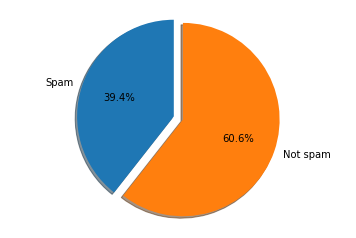

In [25]:
# visualize data


# generate a pie chart showing the distribution of the two classes
spam_size = spambase[spambase['spam_class']==1].shape[0]
nonspam_size = spambase[spambase['spam_class']==0].shape[0]
labels = 'Spam', 'Not spam'
sizes = [spam_size, nonspam_size]
explode = (0.1, 0)  # only "explode" the 1st slice (i.e. 'Spam')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

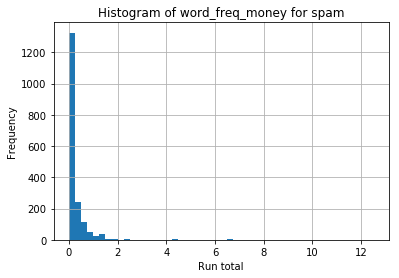

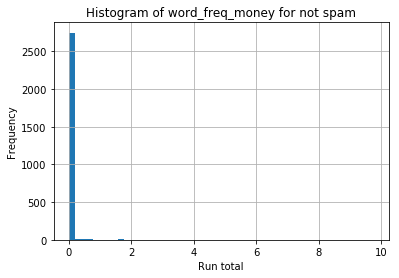

In [26]:
# histogram of values for the feature 'word_freq_money' for the class 'spam'
spambase[spambase['spam_class']==1].word_freq_money.hist(bins=50)
plt.title('Histogram of word_freq_money for spam')
plt.xlabel('Run total')
plt.ylabel('Frequency')
plt.show()

# histogram of values for the feature 'word_freq_money' for the class 'not spam'
spambase[spambase['spam_class']==0].word_freq_money.hist(bins=50)
plt.title('Histogram of word_freq_money for not spam')
plt.xlabel('Run total')
plt.ylabel('Frequency')
plt.show()


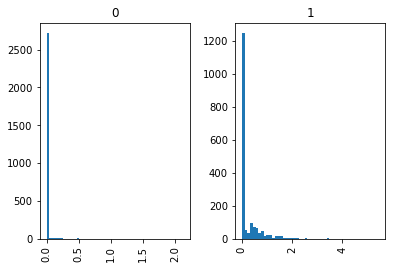

In [27]:
# one histogram for each class of values of feature 'word_freq_000'
spambase.word_freq_000.hist(by=spambase['spam_class'],bins=50)
plt.show()

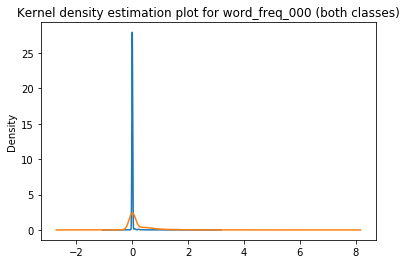

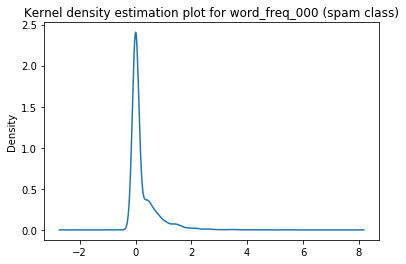

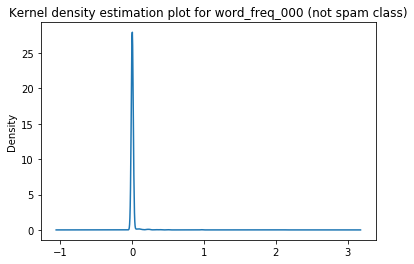

In [28]:
# kernel density estimation plot for feature 'word_freq_000' first both classes on same graph then separately

# a kernel density estimation plot estimates what the probability density function that would generat
# the observed values would look like

spambase.groupby('spam_class').word_freq_000.plot(kind='kde')
plt.title('Kernel density estimation plot for word_freq_000 (both classes)')
plt.show()

spambase[spambase['spam_class']==1].word_freq_000.plot(kind='kde')
plt.title('Kernel density estimation plot for word_freq_000 (spam class)')
plt.show()

spambase[spambase['spam_class']==0].word_freq_000.plot(kind='kde')
plt.title('Kernel density estimation plot for word_freq_000 (not spam class)')
plt.show()

#### Now let's do our logistic regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# first we need to prepare the data

# add an intercept column
spambase['_intercept'] = 1

# Copy spambase across and drop spam_class (we don't include the class feature in the training data)
X = spambase
X = X.drop('spam_class', axis=1)



# Set y as the spam column, we need to wrap it in the dataframe to stop it being series 
y = pd.DataFrame(spambase.spam_class)

# flatten y into a 1-D array
y = np.ravel(y)

# now split the data into training data and test data (80/20 split)
# random_state = k sets a specific random seed
# since random_state is fixed, this call will always produce the same split
# if you leave out the random_state value, you will get a different random split when you run it agaimn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# create our model and fit it to our training data
# the large C value essentail turns off regularization (which we will cover later)
# ignore it for now
logres = LogisticRegression(C = 1e9)
logres.fit(X_train,y_train)

# let's check our training and test accuracy
train_score = logres.score(X_train, y_train)
test_score = logres.score(X_test, y_test)

print ("Score on training data:", train_score)
print ("Score on test data:", test_score)

Score on training data: 0.932880434783
Score on test data: 0.909880564604


#### In the cell below, write code that computes and prints the mean of the training and test errors for ten RANDOM train/test splits

In [30]:
# compute and print the mean of the training and test errors for ten RANDOM train/test splits

for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    logres = LogisticRegression(C = 1e9)
    logres.fit(X_train,y_train)

    train_score = logres.score(X_train, y_train)
    test_score = logres.score(X_test, y_test)
    
    train_err = 1-train_score
    test_err = 1- test_score    

    print ("Score on training data:", train_score)
    print ("Score on test data:", test_score)
    
#     print (i)

train_mean=train_err.mean()
test_mean=test_err.mean()

print ("\n")
print ("mean of training error ",train_mean)
print ("mean of test error",test_mean)

# insert code here

Score on training data: 0.93125
Score on test data: 0.932681867535
Score on training data: 0.935326086957
Score on test data: 0.933767643865
Score on training data: 0.927717391304
Score on test data: 0.922909880565
Score on training data: 0.933423913043
Score on test data: 0.931596091205
Score on training data: 0.93152173913
Score on test data: 0.928338762215
Score on training data: 0.930163043478
Score on test data: 0.937024972856
Score on training data: 0.93152173913
Score on test data: 0.913137893594
Score on training data: 0.93125
Score on test data: 0.917480998914
Score on training data: 0.926902173913
Score on test data: 0.937024972856


mean of training error  0.073097826087
mean of test error 0.0629750271444


#### Let's look and try to understand our model's coefficients

In [31]:
# let's get back to our first fitted model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logres = LogisticRegression(C = 1e9)
logres.fit(X_train,y_train)

# examine the coefficients of our fitted model
column_names = np.asarray(X.columns.values)
m = X.columns.size

print ("m:",m)
i = 0
while (i<m):
    print(logres.coef_[0,i], " * ",column_names[i])
    i = i + 1

m: 58
-0.308762054804  *  word_freq_make
-0.142084495633  *  word_freq_address
0.158220052469  *  word_freq_all
1.8828998571  *  word_freq_3d
0.61428185556  *  word_freq_our
0.768618764478  *  word_freq_over
2.34501394701  *  word_freq_remove
0.514412164538  *  word_freq_internet
0.654060509072  *  word_freq_order
0.0766096825861  *  word_freq_mail
0.245550954239  *  word_freq_receive
-0.114543662897  *  word_freq_will
-0.0888295899836  *  word_freq_people
0.177355921616  *  word_freq_report
1.01470059315  *  word_freq_addresses
0.831010637826  *  word_freq_free
0.860234578868  *  word_freq_business
-0.0574466293609  *  word_freq_email
0.0909931423934  *  word_freq_you
0.685775236204  *  word_freq_credit
0.272038841334  *  word_freq_your
0.18514242033  *  word_freq_font
2.04587724131  *  word_freq_000
0.430750989878  *  word_freq_money
-1.92728868065  *  word_freq_hp
-1.29310637814  *  word_freq_hpl
-17.037932047  *  word_freq_george
0.607917512107  *  word_freq_650
-2.18068749157  *  

#### Let's produce a nice looking confusion matrix

Confusion matrix, without normalization
[[503  35]
 [ 48 335]]
Normalized confusion matrix
[[ 0.93  0.07]
 [ 0.13  0.87]]


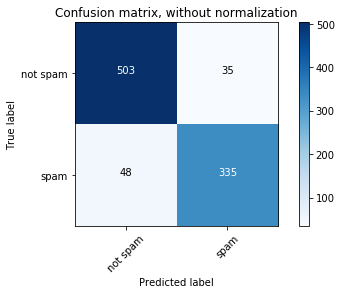

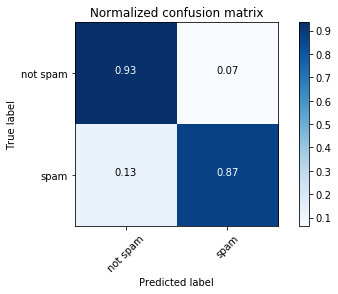

True positives: 335
True negatives: 503
False positives: 35
False negatives: 48


In [32]:
import itertools
from sklearn.metrics import confusion_matrix

# we need the actual predictions stored so we can generate the confusion matrix
y_pred = logres.fit(X_train, y_train).predict(X_test)

# plot confusion matrix function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
class_names = ['not spam','spam']
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# We can get each value of the confusion matrix individually
# Let's assume the spam class is the positive class
print("True positives:",cnf_matrix[1,1])
print("True negatives:",cnf_matrix[0,0])
print("False positives:",cnf_matrix[0,1])
print("False negatives:",cnf_matrix[1,0])


#### Generate a new logisitic regression models.

Fit logres1 by fitting it to same data as logres with 2-3 of the features with large coefficient values dropped (can be either positive or negative or both)

After droppng the features and fitting the model, print the training and test accuracies and the coefficients. Examine the results for differences,

In [33]:
# write code for logres1 here

# dropping values
# -6.51302145888  *  word_freq_cs
# -5.76574509737  *  word_freq_conference
# 5.69237026193  *  char_freq_$


# X_1 = X.drop('spam_class', axis=1)

# X_1 = X.drop('char_freq_$', axis=1)
# X_1 = X.drop('word_freq_cs', axis=1)
X_1 = X.drop(['char_freq_$','word_freq_conference','word_freq_cs'], axis=1)

y_1 = pd.DataFrame(spambase.spam_class)

y_1 = np.ravel(y_1)

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=0)

logres_1 = LogisticRegression(C = 1e9)
logres_1.fit(X_train_1,y_train_1)


train_score_1 = logres_1.score(X_train_1, y_train_1)
test_score_1 = logres_1.score(X_test_1, y_test_1)

print ("New Score on training data:", train_score_1)
print ("New Score on test data:", test_score_1, "\n")



# Cheking accuracy for new Logres1
for i in range(1,10):
    X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_1, y_1, test_size=0.2, random_state=i)
    logres_2 = LogisticRegression(C = 1e9)
    logres_2.fit(X_train_2,y_train_2)

    train_score_2 = logres_2.score(X_train_2, y_train_2)
    test_score_2 = logres_2.score(X_test_2, y_test_2)
    
    new_train_err = 1-train_score_2
    new_test_err = 1- test_score_2    

    print ("New iterative Score on training data:", train_score_2)
    print ("New iterative Score on test data:", test_score_2)
    
#     print (i)

train_mean_new = new_train_err.mean()
test_mean_new = new_test_err.mean()

print ("\n")
print ("mean of training accuracy ",train_mean_new)
print ("mean of test accuracy",test_mean_new,"\n")


# Co-efficient checking for new 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logres_2 = LogisticRegression(C = 1e9)
logres_2.fit(X_train_1,y_train_1)

# examine the coefficients of our fitted model
column_names = np.asarray(X_1.columns.values)
m_new = X_1.columns.size
print ("new m:",m_new)
i = 0
while (i<m_new):
    print(logres.coef_[0,i], " * ",column_names[i])
    i = i + 1

New Score on training data: 0.925815217391
New Score on test data: 0.905537459283 

New iterative Score on training data: 0.923641304348
New iterative Score on test data: 0.925081433225
New iterative Score on training data: 0.923641304348
New iterative Score on test data: 0.921824104235
New iterative Score on training data: 0.920652173913
New iterative Score on test data: 0.922909880565
New iterative Score on training data: 0.92527173913
New iterative Score on test data: 0.926167209555
New iterative Score on training data: 0.920923913043
New iterative Score on test data: 0.919652551574
New iterative Score on training data: 0.921195652174
New iterative Score on test data: 0.923995656895
New iterative Score on training data: 0.92472826087
New iterative Score on test data: 0.913137893594
New iterative Score on training data: 0.925815217391
New iterative Score on test data: 0.903365906623
New iterative Score on training data: 0.922282608696
New iterative Score on test data: 0.928338762215


#### In the box below, write the code to generate and the ROC curves for logres and logres1 on the same graph.

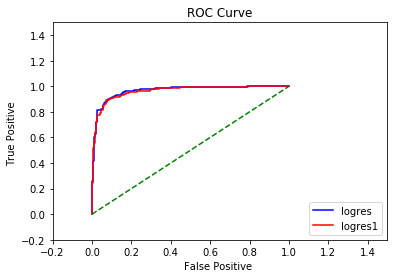

In [34]:
from sklearn.metrics import roc_curve


y_pred = logres.fit(X_train, y_train).decision_function(X_test)    
false_pos, true_pos, thres = roc_curve(y_test, y_pred)
# roc_auc = auc(false_pos, true_pos)

plt.plot(false_pos, true_pos,'b',label='logres')
# plt.show()
# print(false_pos)
# print (true_pos)

# print(thres)


# ROC for logres1
y_pred_1 = logres_1.fit(X_train_1, y_train_1).decision_function(X_test_1)    
false_pos_1, true_pos_1, thres_1 = roc_curve(y_test_1, y_pred_1)
# roc_auc_1 = auc(false_pos_1, true_pos_1)

plt.plot(false_pos_1, true_pos_1,'r',label='logres1')

plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'g--')
plt.xlim([-0.2,1.5])
plt.ylim([-0.2,1.5])
plt.ylabel('True Positive ')
plt.xlabel('False Positive ')
plt.show()



#### In the box below, write the code to compute and print the AUC for both curves.

In [35]:
from sklearn.metrics import auc

auc_0 = auc(false_pos, true_pos)
print ("AUC for logres:", auc_0)

auc_1 = auc(false_pos_1, true_pos_1)
print ("AUC for logres1:", auc_1)

# write the AUC code here


AUC for logres: 0.96625641822
AUC for logres1: 0.962063342619
